In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
seed = 202
np.random.seed(seed)

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Garbage collector
import gc
gc.enable()

In [2]:
# Import the preprocessed dataframes
train_raw_df = pd.read_csv("preprocessed_train_v2(3).csv",
    dtype={'fullVisitorId': str}, nrows=None)
test_raw_df = pd.read_csv("preprocessed_test_v2(3).csv",
    dtype={'fullVisitorId': str}, nrows=None)
train_raw_df.shape, test_raw_df.shape

((1708337, 38), (401589, 38))

In [3]:
train_raw_df.head()

,channelGrouping,customDimensions,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,...,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",3162355547410993243,1508198450,1,1508198450,Firefox,desktop,False,Windows,...,unknown,True,0.0,unknown,unknown,False,water bottle,organic,unknown,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",8934116514970143966,1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,...,unknown,True,0.0,unknown,unknown,False,unknown,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",7992466427990357681,1508201613,1,1508201613,Chrome,mobile,True,Android,...,unknown,True,0.0,unknown,unknown,True,unknown,unknown,unknown,(direct)
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",9075655783635761930,1508169851,1,1508169851,Chrome,desktop,False,Windows,...,unknown,True,0.0,unknown,unknown,False,unknown,organic,unknown,google
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",6960673291025684308,1508190552,1,1508190552,Chrome,desktop,False,Windows,...,unknown,True,0.0,unknown,unknown,False,unknown,organic,unknown,google


### Convert visitStartTime to different data features

In [4]:
def expand_visit_start_time(df):
    df['full_date'] = pd.to_datetime(df['visitStartTime'], unit='s')
    df['date'] = df['full_date'].dt.date
    df['day_of_week'] = df['full_date'].dt.dayofweek
    df['hour_of_day'] = df['full_date'].dt.hour
    df['day_of_month'] = df['full_date'].dt.day
    df['week_of_year'] = df['full_date'].dt.weekofyear
    
    # Drop date column
    df.drop(['full_date'], axis=1, inplace=True)
    df.drop(['visitStartTime'], axis=1, inplace=True)
    return df

##### add here new features

In [5]:
def apply_feature_engineering(df):
    
    df = expand_visit_start_time(df)
     
    return df

### Checkpoint

In [6]:
train_df = apply_feature_engineering(train_raw_df)
test_df = apply_feature_engineering(test_raw_df)
train_df.shape, test_df.shape

((1708337, 42), (401589, 42))

In [9]:
train_df.head()

,channelGrouping,customDimensions,fullVisitorId,visitId,visitNumber,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,...,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,date,day_of_week,hour_of_day,day_of_month,week_of_year
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",3162355547410993243,1508198450,1,Firefox,desktop,False,Windows,unknown,...,False,water bottle,organic,unknown,google,2017-10-17,1,0,17,42
1,Referral,"[{'index': '4', 'value': 'North America'}]",8934116514970143966,1508176307,6,Chrome,desktop,False,Chrome OS,Cupertino,...,False,unknown,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com,2017-10-16,0,17,16,42
2,Direct,"[{'index': '4', 'value': 'North America'}]",7992466427990357681,1508201613,1,Chrome,mobile,True,Android,unknown,...,True,unknown,unknown,unknown,(direct),2017-10-17,1,0,17,42
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",9075655783635761930,1508169851,1,Chrome,desktop,False,Windows,unknown,...,False,unknown,organic,unknown,google,2017-10-16,0,16,16,42
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",6960673291025684308,1508190552,1,Chrome,desktop,False,Windows,unknown,...,False,unknown,organic,unknown,google,2017-10-16,0,21,16,42


In [54]:
"""test_start_date = min(test_df.date)
test_end_date = max(test_df.date)

test_label_start_date = pd.to_datetime("2018-12-01").date()
test_label_end_date = pd.to_datetime("2019-01-31").date()

missing_days = (test_label_start_date - test_end_date).days
prediction_span = (test_label_end_date - test_label_start_date).days + 1

print("There is a gap of %d days between the last day of our dataset and the prediction" % missing_days)
print("We have to predict %d days after this gap" % prediction_span)"""

There is a gap of 46 days between the last day of our dataset and the prediction
We have to predict 62 days after this gap


In [57]:
train_start = pd.to_datetime("2017-05-01").date()
train_end = pd.to_datetime("2017-10-16").date()

train_label_start = pd.to_datetime("2017-12-01").date()
train_label_end = pd.to_datetime("2018-01-31").date()

In [58]:
temp_train = train_df[(train_df['date'].values <= train_end) & (train_df['date'].values >= train_start)]
temp_train_label = train_df[(train_df['date'].values <= train_label_end) & (train_df['date'].values >= train_label_start)]
temp_train.shape, temp_train_label.shape

((427826, 42), (180572, 42))

In [59]:
# Create a dataframe containing only couples of fullvisitorid and totaltransactionrevenue when the latter is not null
def zip_df_on_revenue(df):
    fullID = []
    not_null_transactions = []
    for row in df.itertuples():
        if(row.totals_transactionRevenue > 0):
            fullID.append(row.fullVisitorId)
            not_null_transactions.append(row.totals_transactionRevenue)
    temp_df = pd.DataFrame({'fullVisitorId': fullID})
    not_null_transactions_temp_df = pd.DataFrame({'totals_transactionRevenue': not_null_transactions})
    temp_df = temp_df.join(not_null_transactions_temp_df)
    return temp_df

In [60]:
zipped_label = zip_df_on_revenue(temp_train_label)
zipped_label.shape

(1405, 2)

In [50]:
# Working but slower version of the cell below
"""%%time
label = []

for user in temp_train['fullVisitorId']:
    temp = 0
    for record in zipped_label.itertuples():
        if (record.fullVisitorId == user):
            temp += record.totals_transactionRevenue
    label.append(temp)"""

Wall time: 21.5 s


In [61]:
%%time
label = []
## Check di Riccardo
for user in temp_train['fullVisitorId'].values:
    temp = 0
    if(user in zipped_label.fullVisitorId.values):
        for record in zipped_label.itertuples():
            if (record.fullVisitorId == user):
                temp += record.totals_transactionRevenue
    label.append(temp)
label

Wall time: 22 s


In [63]:
temp_train = temp_train.reset_index(drop=True) # Important!

temp_label = pd.DataFrame({'label': label})
temp_label = temp_label.reset_index(drop=True) # Important!

temp_train = temp_train.join(temp_label)

temp_train.head()

,channelGrouping,customDimensions,fullVisitorId,visitId,visitNumber,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,...,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,date,day_of_week,hour_of_day,day_of_month,week_of_year,label
0,Referral,"[{'index': '4', 'value': 'North America'}]",8934116514970143966,1508176307,6,Chrome,desktop,False,Chrome OS,Cupertino,...,unknown,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com,2017-10-16,0,17,16,42,15990000.0
1,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",9075655783635761930,1508169851,1,Chrome,desktop,False,Windows,unknown,...,unknown,organic,unknown,google,2017-10-16,0,16,16,42,0.0
2,Organic Search,"[{'index': '4', 'value': 'Central America'}]",6960673291025684308,1508190552,1,Chrome,desktop,False,Windows,unknown,...,unknown,organic,unknown,google,2017-10-16,0,21,16,42,0.0
3,Referral,"[{'index': '4', 'value': 'North America'}]",0166277907528479249,1508196701,1,Chrome,desktop,False,Macintosh,San Francisco,...,unknown,unknown,/offer/2145,(direct),2017-10-16,0,23,16,42,0.0
4,Referral,"[{'index': '4', 'value': 'EMEA'}]",8349655975937271469,1508152478,1,Chrome,desktop,False,Macintosh,London,...,unknown,referral,/a/google.com/nest-vision/dropcam-field-tester...,sites.google.com,2017-10-16,0,11,16,42,0.0


In [64]:
for i in temp_train_label.itertuples():
    if i.fullVisitorId == '8934116514970143966':
        print(i.totals_transactionRevenue)

15990000.0


### Data preparation for catboost

In [65]:
temp_train.columns

Index(['channelGrouping', 'customDimensions', 'fullVisitorId', 'visitId',
       'visitNumber', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim',
       'totals_timeOnSite', 'totals_totalTransactionRevenue',
       'totals_transactionRevenue', 'totals_transactions',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 

In [66]:
cont_features = ['totals_hits', 'totals_pageviews', 'visitNumber']

bool_features = []

cat_features = ['fullVisitorId',
                'customDimensions',
                'visitId',
                'channelGrouping', 
                'device_browser', 
                'device_deviceCategory',
                'device_operatingSystem', 
                'geoNetwork_continent',
                'geoNetwork_subContinent', 
                'trafficSource_medium', 
                'geoNetwork_country', 
                'geoNetwork_metro', 
                'geoNetwork_city', 
                'geoNetwork_region',
                'geoNetwork_networkDomain',
                'trafficSource_source', 
                'day_of_week', 
                'hour_of_day', 
                'day_of_month',
                'week_of_year', 
                'trafficSource_adContent', 
                'trafficSource_adwordsClickInfo.adNetworkType', 
                'trafficSource_adwordsClickInfo.gclId',
                'trafficSource_adwordsClickInfo.page', 
                'trafficSource_adwordsClickInfo.slot', 
                'trafficSource_keyword', 
                'trafficSource_referralPath',
                'trafficSource_campaign',
                #ex booleans
                'device_isMobile', 
                'trafficSource_isTrueDirect', 
                'trafficSource_adwordsClickInfo.isVideoAd', 
                'totals_bounces', 
                'totals_newVisits',
                'totals_sessionQualityDim',
                'totals_timeOnSite',
                'totals_totalTransactionRevenue',
                'totals_transactionRevenue',
                'totals_transactions'

               ]

In [67]:
train = temp_train[cont_features + bool_features + cat_features]
train_y = temp_train['label'].values
log_y = np.log1p(train_y)

In [68]:
#check if we took all the features except totals_totalTransactionRevenue (yep!)
for c in temp_train.columns:
    if c not in train.columns:
        print(c)

date
label


In [80]:
"""from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, log_y, train_size=0.85, random_state=seed)

X_train.shape, X_val.shape, y_train.shape, y_val.shape"""

'from sklearn.model_selection import train_test_split\n\nX_train, X_val, y_train, y_val = train_test_split(train, log_y, train_size=0.85, random_state=seed)\n\nX_train.shape, X_val.shape, y_train.shape, y_val.shape'

### Feature ranking with catboost

In [70]:
#generate categorical column indices dinamically
cat_positions = []
for i in cat_features:
    cat_positions.append(train.columns.get_loc(i))
cat_positions

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [92]:
"""%%time
from catboost import CatBoostRegressor

# necessary for feature importance ranking
# pool = Pool(train, log_y)


#fit catboost regressor
cat = CatBoostRegressor(
    random_seed = seed,
    loss_function = 'RMSE',
    eval_metric = 'RMSE',
    logging_level='Silent',
    task_type = 'GPU'
)


cat.fit(train, log_y,
        cat_features = cat_positions
       )"""

Wall time: 12min 55s


In [89]:
train.columns

Index(['totals_hits', 'totals_pageviews', 'visitNumber', 'fullVisitorId',
       'customDimensions', 'visitId', 'channelGrouping', 'device_browser',
       'device_deviceCategory', 'device_operatingSystem',
       'geoNetwork_continent', 'geoNetwork_subContinent',
       'trafficSource_medium', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_city', 'geoNetwork_region', 'geoNetwork_networkDomain',
       'trafficSource_source', 'day_of_week', 'hour_of_day', 'day_of_month',
       'week_of_year', 'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_keyword',
       'trafficSource_referralPath', 'trafficSource_campaign',
       'device_isMobile', 'trafficSource_isTrueDirect',
       'trafficSource_adwordsClickInfo.isVideoAd', 'totals_bounces',
       'totals_newVisits', 'totals_sessionQualityDim'

In [82]:
%%time
from catboost import CatBoostRegressor
from catboost import Pool 

# necessary for feature importance ranking
pool = Pool(train, log_y, cat_features = cat_positions)
# train_pool = Pool(X_train, y_train, cat_features = cat_positions)
# eval_pool = Pool(X_val, y_val, cat_features = cat_positions)


#fit catboost regressor
cat = CatBoostRegressor(
    random_seed = seed,
    loss_function = 'RMSE',
    eval_metric = 'RMSE',
    logging_level='Silent',
    task_type = 'GPU',
#     use_best_model = True
)


cat.fit(pool,
#        eval_set = eval_pool
       )

Wall time: 12min 57s


### Inspect features inside the model

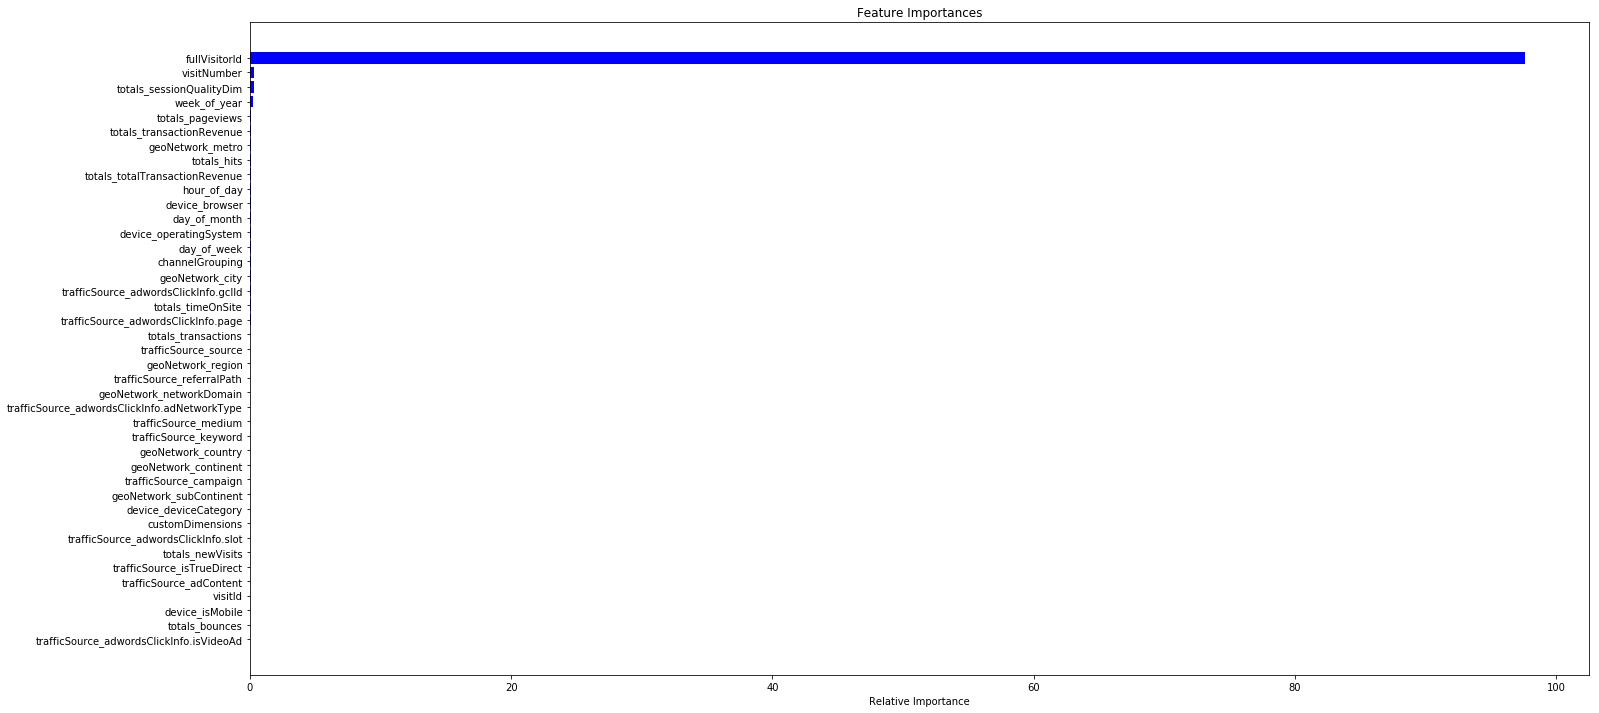

In [83]:
# get features importance ranking
# the individual importance values for each of the input features
features = train.columns
importances = np.asarray(cat.get_feature_importance(pool, fstr_type='FeatureImportance'))
indices = np.argsort(importances)# top features
plt.figure(figsize=(24, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [117]:
import shap

# load JS visualization code to notebook
shap.initjs()
shap_values = np.asarray(cat.get_feature_importance(pool, fstr_type='ShapValues'))

The model has complex ctrs, so the SHAP values will be calculated approximately.


In [118]:
"""explainer = shap.TreeExplainer(cat)
print(explainer.expected_value)"""

None


In [106]:
"""(shap_values[:,:41]).shape"""

(427826, 41)

In [108]:
"""pool.shape"""

(427826, 41)

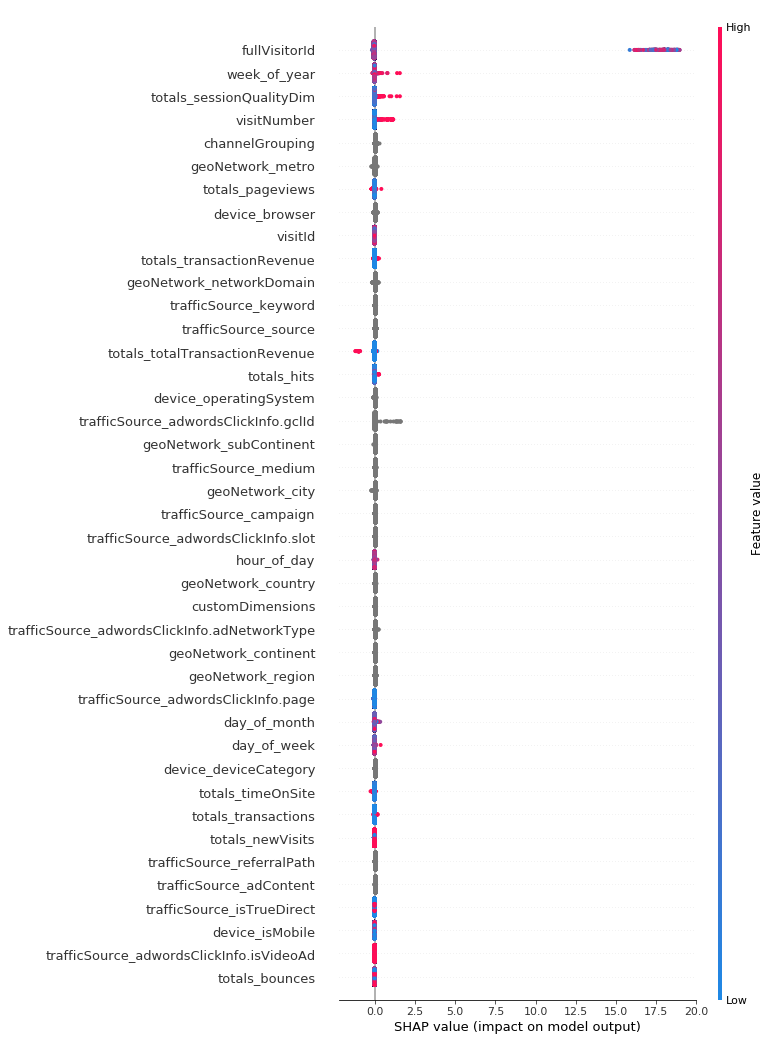

In [140]:
# summarize the effects of all the features
shap.summary_plot(
    shap_values[:,:41], 
    features = train, 
    feature_names = train.columns,
    max_display =41
)

### Export Dataframes

In [7]:
train_df.to_csv('featured_train(4).csv', index = False)
test_df.to_csv('featured_test(4).csv', index = False)